In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
import datetime

In [2]:
def day_modifier(x):
    # x is a number
    
    if pd.isna(x) == True:
        return x
    else:
        x = str(x)
        if len(x) == 1:
            return '0' + x
        else:
            return x

In [3]:
def landnum_modifier(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x = str(x).replace('외', '').replace(' ','')
        splitted = x.split('-')
        if len(splitted) == 1:
            return x + '-0'
        else:
            return x

In [4]:
def yunrip_data_prep():
    basedir = './국토교통부_실거래가_공개시스템/연립다세대/매매/'
    filenames = [f for f in os.listdir(basedir) if (f.endswith('.csv'))&('(' in f)]
    
    dfs_list = []
    for i, f in tqdm(enumerate(filenames)):
        df = pd.read_csv(basedir + f, encoding='euc-kr', header=15)
        if '해제사유발생일' in df.columns.tolist():
            df = df.drop(columns=['해제사유발생일'])

        dfs_list.append(df)
    
    concat_df = pd.concat(dfs_list).reset_index(drop=True)
    
    concat_df['번지'] = concat_df['번지'].apply(landnum_modifier)
    
    concat_df['계약년월'] = concat_df['계약년월'].apply(str)
    concat_df['계약일'] = concat_df['계약일'].apply(str)
    
    concat_df['건물연식'] = concat_df['계약년월'].apply(lambda x: int(x[:4])) - concat_df['건축년도']
    
    concat_df['계약일'] = concat_df['계약일'].apply(day_modifier)
    
    concat_df['계약날짜'] = concat_df['계약년월'].apply(lambda x: x[:4]) + '-' + concat_df['계약년월'].apply(lambda x: x[-2:])\
    + '-' + concat_df['계약일']
    
    concat_df['계약날짜'] = pd.to_datetime(concat_df['계약날짜'], format='%Y-%m-%d')
    
    concat_df['거래금액(만원)'] = concat_df['거래금액(만원)'].apply(lambda x: int(x.replace(',','')))
    concat_df['전용면적단가(만원/㎡)'] = concat_df['거래금액(만원)'] / concat_df['전용면적(㎡)']
    
    concat_df['지번주소'] = concat_df['시군구'] + ' ' + concat_df['번지']
    
    concat_df['년'] = concat_df['계약날짜'].dt.year
    
    cols_to_drop = ['시군구', '번지', '본번', '부번', '지번주소', '계약년월', '계약일', '도로명']
    
    concat_df = concat_df[concat_df['년'] >= 2015]
    
    return concat_df[['지번주소'] + [col for col in concat_df.columns if col not in cols_to_drop]]

In [5]:
def officetel_data_prep():
    basedir = './국토교통부_실거래가_공개시스템/오피스텔/매매/'
    filenames = [f for f in os.listdir(basedir) if (f.endswith('.csv'))&('(' in f)]
    
    dfs_list = []
    for i, f in tqdm(enumerate(filenames)):
        df = pd.read_csv(basedir + f, encoding='euc-kr', header=15)
        if '해제사유발생일' in df.columns.tolist():
            df = df.drop(columns=['해제사유발생일'])

        dfs_list.append(df)
    
    concat_df = pd.concat(dfs_list).reset_index(drop=True)
    
    concat_df['번지'] = concat_df['번지'].apply(landnum_modifier)
    
    concat_df['계약년월'] = concat_df['계약년월'].apply(str)
    concat_df['계약일'] = concat_df['계약일'].apply(str)
    
    concat_df['건물연식'] = concat_df['계약년월'].apply(lambda x: int(x[:4])) - concat_df['건축년도']
    
    concat_df['계약일'] = concat_df['계약일'].apply(day_modifier)
    
    concat_df['계약날짜'] = concat_df['계약년월'].apply(lambda x: x[:4]) + '-' + concat_df['계약년월'].apply(lambda x: x[-2:])\
    + '-' + concat_df['계약일']
    
    concat_df['계약날짜'] = pd.to_datetime(concat_df['계약날짜'], format='%Y-%m-%d')
    
    concat_df['거래금액(만원)'] = concat_df['거래금액(만원)'].apply(lambda x: int(x.replace(',','')))
    concat_df['전용면적단가(만원/㎡)'] = concat_df['거래금액(만원)'] / concat_df['전용면적(㎡)']
    
    concat_df['지번주소'] = concat_df['시군구'] + ' ' + concat_df['번지']
    
    concat_df['년'] = concat_df['계약날짜'].dt.year
    
    cols_to_drop = ['시군구', '번지', '본번', '부번', '지번주소', '계약년월', '계약일', '도로명']
    
    concat_df = concat_df[concat_df['년'] >= 2015]
        
    return concat_df[['지번주소'] + [col for col in concat_df.columns if col not in cols_to_drop]]

In [6]:
yunrip_df = yunrip_data_prep().dropna().reset_index(drop=True)
print(yunrip_df.shape)
yunrip_df.head()

16it [00:02,  6.79it/s]


(329804, 11)


,지번주소,건물명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,건물연식,계약날짜,전용면적단가(만원/㎡),년
0,서울특별시 강남구 개포동 1216-4,(1216-4),33.77,21.67,24800,4,2012.0,3.0,2015-03-26,734.379627,2015
1,서울특별시 강남구 개포동 1216-4,(1216-4),35.87,23.02,27200,4,2012.0,3.0,2015-06-23,758.293839,2015
2,서울특별시 강남구 개포동 1216-4,(1216-4),29.12,18.68,22200,4,2012.0,3.0,2015-07-20,762.362637,2015
3,서울특별시 강남구 개포동 1216-4,(1216-4),29.97,19.23,22500,3,2012.0,3.0,2015-08-06,750.750751,2015
4,서울특별시 강남구 개포동 170-18,(170-18),26.60,21.53,21000,1,1988.0,27.0,2015-08-21,789.473684,2015


In [7]:
officetel_df = officetel_data_prep().dropna().reset_index(drop=True)
print(officetel_df.shape)
officetel_df.head()

16it [00:00, 23.80it/s]


(76332, 10)


,지번주소,단지명,전용면적(㎡),거래금액(만원),층,건축년도,건물연식,계약날짜,전용면적단가(만원/㎡),년
0,서울특별시 강남구 개포동 13-3,대청타워,43.24,22000,14,1997.0,18.0,2015-01-08,508.788159,2015
1,서울특별시 강남구 개포동 13-3,대청타워,32.44,15800,21,1997.0,18.0,2015-01-12,487.053021,2015
2,서울특별시 강남구 개포동 13-3,대청타워,32.44,16000,10,1997.0,18.0,2015-01-19,493.218249,2015
3,서울특별시 강남구 개포동 13-3,대청타워,32.44,15400,21,1997.0,18.0,2015-01-26,474.722565,2015
4,서울특별시 강남구 개포동 13-3,대청타워,31.91,16000,26,1997.0,18.0,2015-01-28,501.410216,2015


In [8]:
def land_shape2(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        if '사다리' in x:
            return '사다리형'
        elif '장방' in x:
            return '장방형'
        elif '정방' in x:
            return '정방형'
        elif '부정' in x:
            return '부정형'
        elif '않음' in x:
            return '지정되지않음'
        elif '자루' in x:
            return '자루형'
        elif '삼각' in x:
            return '삼각형'
        else:
            return '기타'

In [9]:
land_specs_df = pd.read_csv('./prepped_data/land_specs_ver_4.csv')
land_specs_df['지형형상2'] = land_specs_df['지형형상'].apply(land_shape2)
print(land_specs_df.shape)
land_specs_df.head()

(8706295, 12)


,지번주소,년,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,공시지가,지형형상2
0,서울특별시 강남구 개포동 100-0,2013,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,325000.0,부정형
1,서울특별시 강남구 개포동 100-0,2014,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,330000.0,부정형
2,서울특별시 강남구 개포동 100-0,2015,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,335000.0,부정형
3,서울특별시 강남구 개포동 100-0,2016,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,345000.0,부정형
4,서울특별시 강남구 개포동 100-0,2017,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,355000.0,부정형


In [10]:
land_specs_df['지형형상'].value_counts()

사다리형      2278575
세로장방      1636461
부정형       1364328
지정되지않음    1241904
가로장방       866599
정방형        845940
자루형        301454
삼각형        165686
역삼각형         5348
Name: 지형형상, dtype: int64

In [11]:
last_df = land_specs_df.drop_duplicates(subset=['지번주소'], keep='last').drop(columns=['년', '공시지가']).reset_index(drop=True)
print(last_df.shape)
last_df.head()

(981464, 10)


,지번주소,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,지형형상2
0,서울특별시 강남구 개포동 100-0,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,부정형
1,서울특별시 강남구 개포동 101-0,전,641.0,자연녹지지역,지정되지않음,전,평지,부정형,맹지,부정형
2,서울특별시 강남구 개포동 102-0,전,509.0,자연녹지지역,지정되지않음,전,평지,부정형,맹지,부정형
3,서울특별시 강남구 개포동 103-0,전,48.7,자연녹지지역,개발제한구역,전,평지,부정형,맹지,부정형
4,서울특별시 강남구 개포동 104-1,전,2995.0,개발제한구역,자연녹지지역,전,완경사,부정형,맹지,부정형


In [12]:
last_df['도로접면'].value_counts()

세로한면(가)    291412
지정되지않음     151282
세로한면(불)    106248
세로각지(가)     80726
소로한면        68840
광대소각        57931
소로각지        57412
중로각지        51606
중로한면        33053
광대로한면       31004
맹지          20664
광대세각        20419
세로각지(불)     10852
Name: 도로접면, dtype: int64

In [43]:
yunrip_merge_df = yunrip_df.merge(land_specs_df, on=['지번주소', '년'])
print(yunrip_merge_df.shape)
yunrip_merge_df.head()

(327513, 21)


,지번주소,건물명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,건물연식,계약날짜,전용면적단가(만원/㎡),년,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,공시지가,지형형상2
0,서울특별시 강남구 개포동 1216-4,(1216-4),33.77,21.67,24800,4,2012.0,3.0,2015-03-26,734.379627,2015,대,257.0,제2종일반주거지역,지정되지않음,다세대,평지,정방형,세로각지(가),3470000.0,정방형
1,서울특별시 강남구 개포동 1216-4,(1216-4),35.87,23.02,27200,4,2012.0,3.0,2015-06-23,758.293839,2015,대,257.0,제2종일반주거지역,지정되지않음,다세대,평지,정방형,세로각지(가),3470000.0,정방형
2,서울특별시 강남구 개포동 1216-4,(1216-4),29.12,18.68,22200,4,2012.0,3.0,2015-07-20,762.362637,2015,대,257.0,제2종일반주거지역,지정되지않음,다세대,평지,정방형,세로각지(가),3470000.0,정방형
3,서울특별시 강남구 개포동 1216-4,(1216-4),29.97,19.23,22500,3,2012.0,3.0,2015-08-06,750.750751,2015,대,257.0,제2종일반주거지역,지정되지않음,다세대,평지,정방형,세로각지(가),3470000.0,정방형
4,서울특별시 강남구 개포동 170-18,(170-18),26.60,21.53,21000,1,1988.0,27.0,2015-08-21,789.473684,2015,대,130.3,제2종일반주거지역,지정되지않음,다세대,평지,세로장방,세로한면(가),4370000.0,장방형


In [44]:
officetel_merge_df = officetel_df.merge(land_specs_df, on=['지번주소', '년'])
print(officetel_merge_df.shape)
officetel_merge_df.head()

(74257, 20)


,지번주소,단지명,전용면적(㎡),거래금액(만원),층,건축년도,건물연식,계약날짜,전용면적단가(만원/㎡),년,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,공시지가,지형형상2
0,서울특별시 강남구 개포동 13-3,대청타워,43.24,22000,14,1997.0,18.0,2015-01-08,508.788159,2015,대,4188.5,일반상업지역,지정되지않음,업무용,평지,세로장방,광대소각,12670000.0,장방형
1,서울특별시 강남구 개포동 13-3,대청타워,32.44,15800,21,1997.0,18.0,2015-01-12,487.053021,2015,대,4188.5,일반상업지역,지정되지않음,업무용,평지,세로장방,광대소각,12670000.0,장방형
2,서울특별시 강남구 개포동 13-3,대청타워,32.44,16000,10,1997.0,18.0,2015-01-19,493.218249,2015,대,4188.5,일반상업지역,지정되지않음,업무용,평지,세로장방,광대소각,12670000.0,장방형
3,서울특별시 강남구 개포동 13-3,대청타워,32.44,15400,21,1997.0,18.0,2015-01-26,474.722565,2015,대,4188.5,일반상업지역,지정되지않음,업무용,평지,세로장방,광대소각,12670000.0,장방형
4,서울특별시 강남구 개포동 13-3,대청타워,31.91,16000,26,1997.0,18.0,2015-01-28,501.410216,2015,대,4188.5,일반상업지역,지정되지않음,업무용,평지,세로장방,광대소각,12670000.0,장방형


In [97]:
yunrip_merge_df['전용면적단가(만원/평)'] = yunrip_merge_df['전용면적단가(만원/㎡)'] * 3.305785
officetel_merge_df['전용면적단가(만원/평)'] = officetel_merge_df['전용면적단가(만원/㎡)'] * 3.305785

In [33]:
def date_modifier(x):
    # x is a string or datetime
    if pd.isna(x) == True:
        return x
    else:
        x = str(x)
        if '-' in x:
            x = x.replace('-', '.')
            
        splitted = x.split('.')
        
        if len(splitted) == 1:
            return np.nan
        else:
            return x.split(' ')[0]

In [35]:
def get_year(x):
    if pd.isna(x) == True:
        return x
    else:
        return int(x.split('.')[0])

In [41]:
def get_bd_type(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        if '오피' in x:
            return '오피스텔'
        else:
            return '다세대'

In [48]:
reference_df = pd.read_excel('./감정평가사_자료/이승준_총괄표.xlsx', header=[0,1]).dropna(subset=[('소재지','소재지')]).sort_values([('소재지', '지역'),('소재지', '소재지'), ('소재지', '지번')]).reset_index(drop=True)
reference_df.columns = [col[0] + '_' + col[1] for col in reference_df.columns]
reference_df['소재지_지번'] = reference_df['소재지_지번'].apply(landnum_modifier)
reference_df['지번주소'] = '서울특별시 ' + reference_df['소재지_지역'] + ' ' + reference_df['소재지_소재지']\
+ ' ' + reference_df['소재지_지번']
reference_df['기준시점2'] = reference_df['수입/비용_기준시점'].apply(date_modifier)
reference_df['년'] = reference_df['기준시점2'].apply(get_year)
reference_df = reference_df.dropna(subset=['기준시점2'])
reference_df['건물유형'] = reference_df['건물내용_건물용도'].apply(get_bd_type)
reference_df = reference_df.merge(last_df, on=['지번주소']).reset_index(drop=True)
print(reference_df.shape)
reference_df.head()

(85, 52)


,소재지_지역,소재지_소재지,소재지_지번,토지내용_용도지역,토지내용_도로너비,토지내용_토지면적(㎡),토지내용_토지매매금액,토지내용_토지매매단가\n(원/㎡),토지내용_공시지가와격차\n(개공/매매),건물내용_건물용도,건물내용_공급면적(㎡),건물내용_전유면적(㎡),건물내용_전용율,건물내용_용적율\n(%),건물내용_건폐율\n(%),건물내용_구분건물호,건물내용_건물동수,건물내용_건물층수,수입/비용_의뢰인,수입/비용_기준시점,수입/비용_전체평가금액,수입/비용_투입비용합계,수입/비용_순이익,수입/비용_순이익율,평가단가(원/전유㎡) _전유면적,평가단가(원/전유㎡) _공급면적,매출원가(원/전유㎡) _전유면적기준,매출원가(원/전유㎡) _공급면적기준,사업진행일자_토지계약일자,사업진행일자_허가일자,사업진행일자_착공일자,사업진행일자_사용승인일,건축비\n(원/평)_Unnamed: 32_level_1,원가비율_토지원가비율,원가비율_건축원가비율,원가비율_부대비용,원가비율_금융비용,원가비율_합계,비고_Unnamed: 38_level_1,지번주소,기준시점2,년,건물유형,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,지형형상2
0,강남구,개포동,1195-10,2종일주,6미터,265.7,2.970000e+09,11178020.0,0.433,다세대주택,519.54,432.22,0.832,195.54,59.62,15개호,1개동,지상5층,SH공사,2020.09.23,4.719500e+09,4.167814e+09,5.516858e+08,0.117,10919208.0,9.083997e+06,9.642807e+06,8372395.0,2019.02.26,2019.06.18,2019.06.18,2020.01.13,5500000.0,0.7563,0.2139,0.0060,0.0239,1.0,NaN,서울특별시 강남구 개포동 1195-10,2020.09.23,2020.0,다세대,대,265.7,제2종일반주거지역,지정되지않음,상업기타,평지,세로장방,세로한면(가),장방형
1,강남구,개포동,1199-7,2종일주,4미터,248.0,2.550000e+09,10282258.0,0.365,다세대주택,463.84,390.67,0.842,187.04,59.61,14개호,1개동,지상5층,LH공사,2019.11.29,4.040000e+09,3.593249e+09,4.467511e+08,0.111,10341209.0,8.709524e+06,9.197658e+06,8074624.0,2018.08.21,2018.12.31,2019.01.07,2019.06.04,5400000.0,0.7520,0.2175,0.0061,0.0244,1.0,NaN,서울특별시 강남구 개포동 1199-7,2019.11.29,2019.0,다세대,대,248.0,제2종일반주거지역,지정되지않음,다세대,평지,세로장방,세로한면(가),장방형
2,강남구,개포동,1216-7,2종일주,8미터,258.1,2.931000e+09,11356064.0,0.472,도시행생활주택,489.46,400.29,0.818,199.62,59.89,15개호,1개동,지상5층,SH공사,2019.11.29,4.586000e+09,4.054965e+09,5.310348e+08,0.116,11456694.0,9.369509e+06,1.013007e+07,8312283.0,2019.01.24,2019.06.17,2019.07.23,2020.02.25,5400000.0,0.7667,0.2034,0.0057,0.0242,1.0,NaN,서울특별시 강남구 개포동 1216-7,2019.11.29,2019.0,다세대,대,258.1,제2종일반주거지역,지정되지않음,상업기타,평지,정방형,소로한면,정방형
3,강남구,역삼동,707-9,일반상업,8미터,363.5,9.500000e+09,26134801.0,0.580,도시행생활주택,1695.85,1289.62,0.760,199.62,59.89,15개호,1개동,지상5층,LH공사,2019.11.29,2.219983e+10,1.398811e+10,8.211721e+09,0.370,17214239.0,1.115945e+07,1.084669e+07,16602582.0,2019.08.14,2019.07.15,2020.01.03,2020.10.07,5800000.0,0.7189,0.2568,0.0072,0.0170,1.0,NaN,서울특별시 강남구 역삼동 707-9,2019.11.29,2019.0,다세대,대,363.5,일반상업지역,지정되지않음,업무용,평지,정방형,세로한면(가),정방형
4,강남구,역삼동,751-6,2종일주,6미터,391.8,5.900000e+09,15058703.0,0.441,도시행생활주택,658.88,537.65,0.816,168.17,46.35,20개호,1개동,지상6층,LH공사,2019.11.29,9.810500e+09,7.604511e+09,2.205989e+09,0.225,18247001.0,1.488966e+07,1.414398e+07,12107552.0,2019.01.04,2019.03.05,2019.04.20,2019.11.29,5500000.0,0.8249,0.1486,0.0042,0.0223,1.0,NaN,서울특별시 강남구 역삼동 751-6,2019.11.29,2019.0,다세대,대,391.8,제2종일반주거지역,지정되지않음,상업기타,평지,세로장방,세로한면(가),장방형


In [49]:
land_basedir = './국토교통부_실거래가_공개시스템/땅값분석/'
yunrip_df = pd.read_csv(land_basedir + 'yunrip_30.csv')
commerce_df = pd.read_csv(land_basedir + 'commerce_30.csv')
land_df = pd.read_csv(land_basedir + 'land.csv')

In [50]:
common_cols = ['시군구', '번지', '용도지역', '도로조건', '계약날짜', '대지면적(㎡)', '거래금액(만원)', '단가(㎡)', '단가(평)', '거래유형', '건물연식']
common_df = pd.concat([yunrip_df[common_cols], commerce_df[common_cols], land_df[[col for col in land_df.columns if col not in ['지목', '지분구분', '해제사유발생일']]]])
common_df['계약날짜'] = pd.to_datetime(common_df['계약날짜'], format='%Y-%m-%d')
print(common_df.shape)
common_df.head()

(168873, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 강남구 개포동,171-13,제2종일반주거지역,8m미만,2019-10-23,56.1,60000.0,1069.518717,3535.598930,연립/다세대,31.0
1,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2018-06-14,45.0,52000.0,1155.555556,3820.018222,연립/다세대,30.0
2,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2019-03-05,45.0,50000.0,1111.111111,3673.094444,연립/다세대,31.0
3,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2020-06-01,45.0,58000.0,1288.888889,4260.789556,연립/다세대,32.0
4,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2020-06-13,45.0,57000.0,1266.666667,4187.327667,연립/다세대,32.0


In [51]:
dandok_filenames = [f for f in os.listdir('./국토교통부_실거래가_공개시스템/단독다가구매매/') if (f.endswith('.csv'))&('(매매)' in f)]
dandok_filenames

['단독다가구(매매)_실거래가_20130101_20131231.csv',
 '단독다가구(매매)_실거래가_20140101_20141231.csv',
 '단독다가구(매매)_실거래가_20150101_20151231.csv',
 '단독다가구(매매)_실거래가_20160101_20161231.csv',
 '단독다가구(매매)_실거래가_20170101_20171231.csv',
 '단독다가구(매매)_실거래가_20180101_20181231.csv',
 '단독다가구(매매)_실거래가_20190101_20191231.csv',
 '단독다가구(매매)_실거래가_20200101_20201231.csv',
 '단독다가구(매매)_실거래가_20210101_20210406.csv']

In [52]:
dfs_list = []
for f in dandok_filenames:
    df = pd.read_csv('./국토교통부_실거래가_공개시스템/단독다가구매매/' + f, encoding='euc-kr', header=15)
    if '해제사유발생일' in df.columns:
        df = df.drop(columns=['해제사유발생일'])
    dfs_list.append(df)

In [55]:
def day_modifier(x):
    # x is a number
    
    if pd.isna(x) == True:
        return x
    else:
        x = str(x)
        if len(x) == 1:
            return '0' + x
        else:
            return x

In [58]:
dandok_df = pd.concat(dfs_list).reset_index(drop=True)
dandok_df['구'] = dandok_df['시군구'].apply(lambda x: x.split(' ')[1])
dandok_df['동'] = dandok_df['시군구'].apply(lambda x: x.split(' ')[2])
dandok_df['거래금액(만원)'] = dandok_df['거래금액(만원)'].apply(lambda x: int(x.replace(',','')))
dandok_df['대지면적(㎡)'] = dandok_df['대지면적(㎡)'].apply(float)
dandok_df['단가(평)'] = dandok_df['거래금액(만원)'] / dandok_df['대지면적(㎡)'] * 3.305785
dandok_df['계약날짜'] = dandok_df['계약년월'].apply(lambda x: str(x)[:4]) + '-' +\
dandok_df['계약년월'].apply(lambda x: str(x)[-2:]) + '-' + dandok_df['계약일'].apply(day_modifier)
dandok_df['계약날짜'] = pd.to_datetime(dandok_df['계약날짜'])
dandok_df.drop(columns=['계약년월', '계약일'], inplace=True)
print(dandok_df.shape)
dandok_df.head()

(109267, 13)


,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,도로명,구,동,단가(평),계약날짜
0,서울특별시 강남구 논현동,8*,다가구,8m미만,329.78,165.4,177500,1993.0,논현로138길,강남구,논현동,3547.622959,2013-05-24
1,서울특별시 강남구 논현동,1**,다가구,8m미만,335.90,171.4,173500,1990.0,학동로12길,강남구,논현동,3346.287617,2013-12-18
2,서울특별시 강남구 논현동,7*,다가구,8m미만,435.32,177.2,138000,1992.0,논현로146길,강남구,논현동,2574.482675,2013-04-23
3,서울특별시 강남구 논현동,1**,다가구,8m미만,347.10,181.9,169000,1991.0,선릉로135길,강남구,논현동,3071.345052,2013-08-28
4,서울특별시 강남구 논현동,2**,다가구,8m미만,401.33,193.8,179000,1997.0,논현로124길,강남구,논현동,3053.330831,2013-05-21


In [62]:
reference_df.head()

,소재지_지역,소재지_소재지,소재지_지번,토지내용_용도지역,토지내용_도로너비,토지내용_토지면적(㎡),토지내용_토지매매금액,토지내용_토지매매단가\n(원/㎡),토지내용_공시지가와격차\n(개공/매매),건물내용_건물용도,건물내용_공급면적(㎡),건물내용_전유면적(㎡),건물내용_전용율,건물내용_용적율\n(%),건물내용_건폐율\n(%),건물내용_구분건물호,건물내용_건물동수,건물내용_건물층수,수입/비용_의뢰인,수입/비용_기준시점,수입/비용_전체평가금액,수입/비용_투입비용합계,수입/비용_순이익,수입/비용_순이익율,평가단가(원/전유㎡) _전유면적,평가단가(원/전유㎡) _공급면적,매출원가(원/전유㎡) _전유면적기준,매출원가(원/전유㎡) _공급면적기준,사업진행일자_토지계약일자,사업진행일자_허가일자,사업진행일자_착공일자,사업진행일자_사용승인일,건축비\n(원/평)_Unnamed: 32_level_1,원가비율_토지원가비율,원가비율_건축원가비율,원가비율_부대비용,원가비율_금융비용,원가비율_합계,비고_Unnamed: 38_level_1,지번주소,기준시점2,년,건물유형,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,지형형상2
0,강남구,개포동,1195-10,2종일주,6미터,265.7,2.970000e+09,11178020.0,0.433,다세대주택,519.54,432.22,0.832,195.54,59.62,15개호,1개동,지상5층,SH공사,2020.09.23,4.719500e+09,4.167814e+09,5.516858e+08,0.117,10919208.0,9.083997e+06,9.642807e+06,8372395.0,2019.02.26,2019.06.18,2019.06.18,2020.01.13,5500000.0,0.7563,0.2139,0.0060,0.0239,1.0,NaN,서울특별시 강남구 개포동 1195-10,2020.09.23,2020.0,다세대,대,265.7,제2종일반주거지역,지정되지않음,상업기타,평지,세로장방,세로한면(가),장방형
1,강남구,개포동,1199-7,2종일주,4미터,248.0,2.550000e+09,10282258.0,0.365,다세대주택,463.84,390.67,0.842,187.04,59.61,14개호,1개동,지상5층,LH공사,2019.11.29,4.040000e+09,3.593249e+09,4.467511e+08,0.111,10341209.0,8.709524e+06,9.197658e+06,8074624.0,2018.08.21,2018.12.31,2019.01.07,2019.06.04,5400000.0,0.7520,0.2175,0.0061,0.0244,1.0,NaN,서울특별시 강남구 개포동 1199-7,2019.11.29,2019.0,다세대,대,248.0,제2종일반주거지역,지정되지않음,다세대,평지,세로장방,세로한면(가),장방형
2,강남구,개포동,1216-7,2종일주,8미터,258.1,2.931000e+09,11356064.0,0.472,도시행생활주택,489.46,400.29,0.818,199.62,59.89,15개호,1개동,지상5층,SH공사,2019.11.29,4.586000e+09,4.054965e+09,5.310348e+08,0.116,11456694.0,9.369509e+06,1.013007e+07,8312283.0,2019.01.24,2019.06.17,2019.07.23,2020.02.25,5400000.0,0.7667,0.2034,0.0057,0.0242,1.0,NaN,서울특별시 강남구 개포동 1216-7,2019.11.29,2019.0,다세대,대,258.1,제2종일반주거지역,지정되지않음,상업기타,평지,정방형,소로한면,정방형
3,강남구,역삼동,707-9,일반상업,8미터,363.5,9.500000e+09,26134801.0,0.580,도시행생활주택,1695.85,1289.62,0.760,199.62,59.89,15개호,1개동,지상5층,LH공사,2019.11.29,2.219983e+10,1.398811e+10,8.211721e+09,0.370,17214239.0,1.115945e+07,1.084669e+07,16602582.0,2019.08.14,2019.07.15,2020.01.03,2020.10.07,5800000.0,0.7189,0.2568,0.0072,0.0170,1.0,NaN,서울특별시 강남구 역삼동 707-9,2019.11.29,2019.0,다세대,대,363.5,일반상업지역,지정되지않음,업무용,평지,정방형,세로한면(가),정방형
4,강남구,역삼동,751-6,2종일주,6미터,391.8,5.900000e+09,15058703.0,0.441,도시행생활주택,658.88,537.65,0.816,168.17,46.35,20개호,1개동,지상6층,LH공사,2019.11.29,9.810500e+09,7.604511e+09,2.205989e+09,0.225,18247001.0,1.488966e+07,1.414398e+07,12107552.0,2019.01.04,2019.03.05,2019.04.20,2019.11.29,5500000.0,0.8249,0.1486,0.0042,0.0223,1.0,NaN,서울특별시 강남구 역삼동 751-6,2019.11.29,2019.0,다세대,대,391.8,제2종일반주거지역,지정되지않음,상업기타,평지,세로장방,세로한면(가),장방형


In [75]:
dandok_df.head()

,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,도로명,구,동,단가(평),계약날짜
0,서울특별시 강남구 논현동,8*,다가구,8m미만,329.78,165.4,177500,1993.0,논현로138길,강남구,논현동,3547.622959,2013-05-24
1,서울특별시 강남구 논현동,1**,다가구,8m미만,335.90,171.4,173500,1990.0,학동로12길,강남구,논현동,3346.287617,2013-12-18
2,서울특별시 강남구 논현동,7*,다가구,8m미만,435.32,177.2,138000,1992.0,논현로146길,강남구,논현동,2574.482675,2013-04-23
3,서울특별시 강남구 논현동,1**,다가구,8m미만,347.10,181.9,169000,1991.0,선릉로135길,강남구,논현동,3071.345052,2013-08-28
4,서울특별시 강남구 논현동,2**,다가구,8m미만,401.33,193.8,179000,1997.0,논현로124길,강남구,논현동,3053.330831,2013-05-21


In [76]:
dandok_df.head()['계약날짜'] - pd.DateOffset(years=5)

0   2008-05-24
1   2008-12-18
2   2008-04-23
3   2008-08-28
4   2008-05-21
Name: 계약날짜, dtype: datetime64[ns]

  0%|                                                                                           | 0/85 [00:00<?, ?it/s]

강남구 개포동 2종일


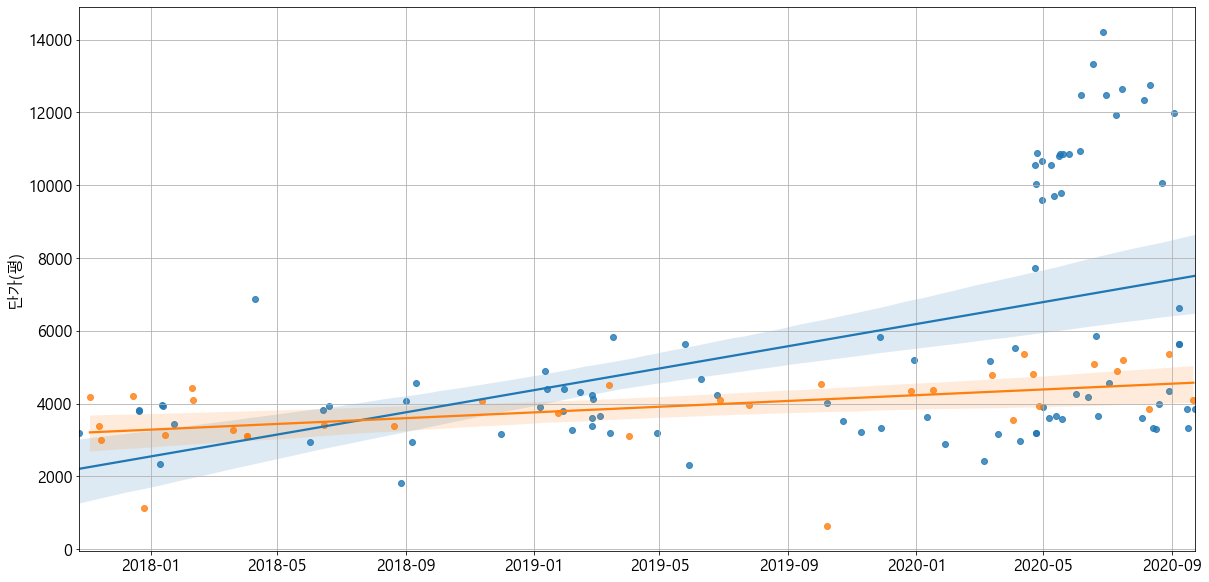

토지구매단가(평): 3695.21308457


<Figure size 432x288 with 0 Axes>

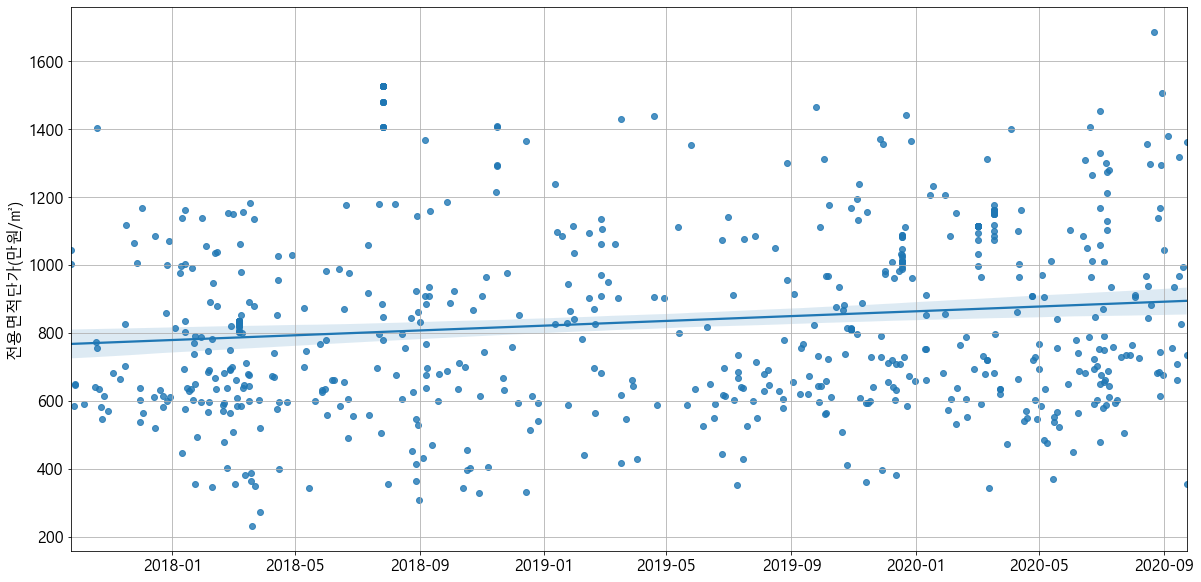

  1%|▉                                                                                  | 1/85 [00:00<01:04,  1.31it/s]

전용면적판매단가(㎡): 1091.9208
도로접면: 세로한면(가)
순이익률(%): 11.700000000000001
강남구 개포동 2종일


<Figure size 432x288 with 0 Axes>

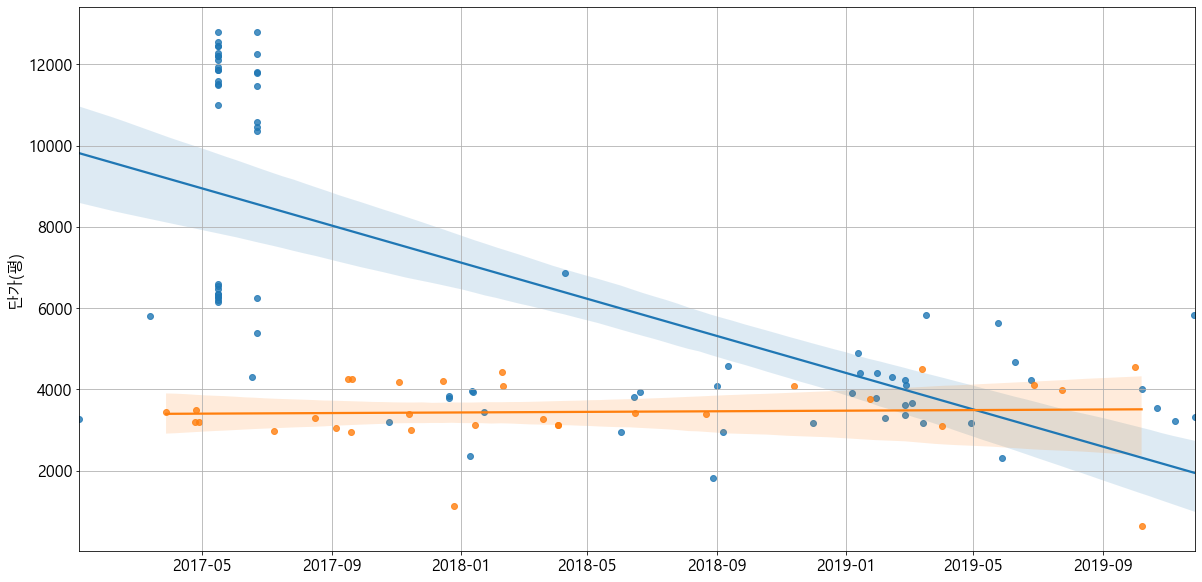

토지구매단가(평): 3399.093426253


<Figure size 432x288 with 0 Axes>

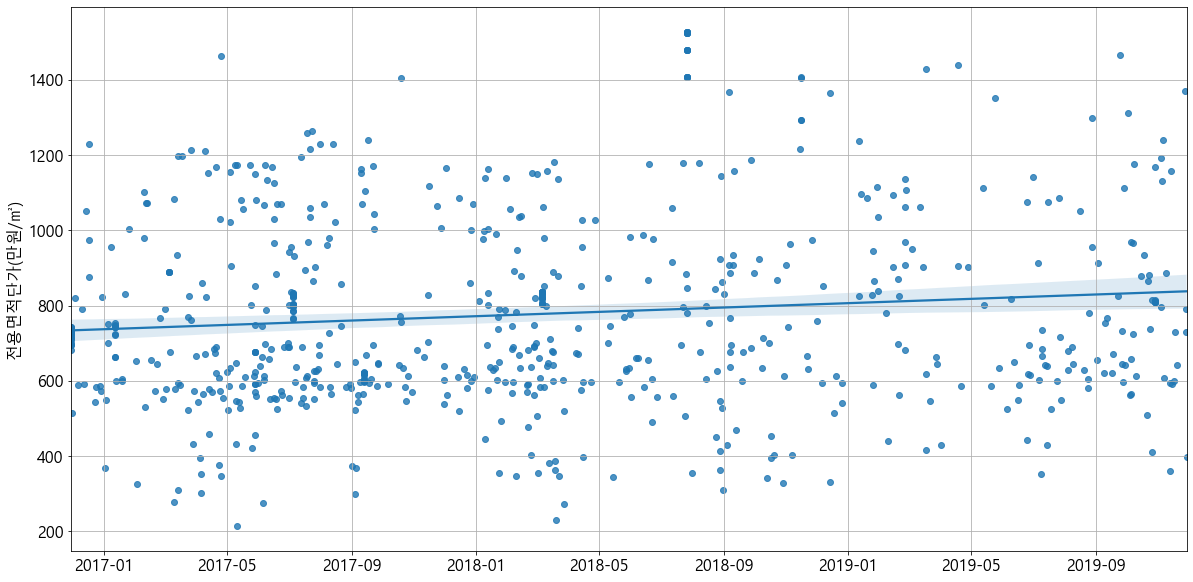

  2%|█▉                                                                                 | 2/85 [00:01<01:05,  1.26it/s]

전용면적판매단가(㎡): 1034.1209
도로접면: 세로한면(가)
순이익률(%): 11.1
강남구 개포동 2종일


<Figure size 432x288 with 0 Axes>

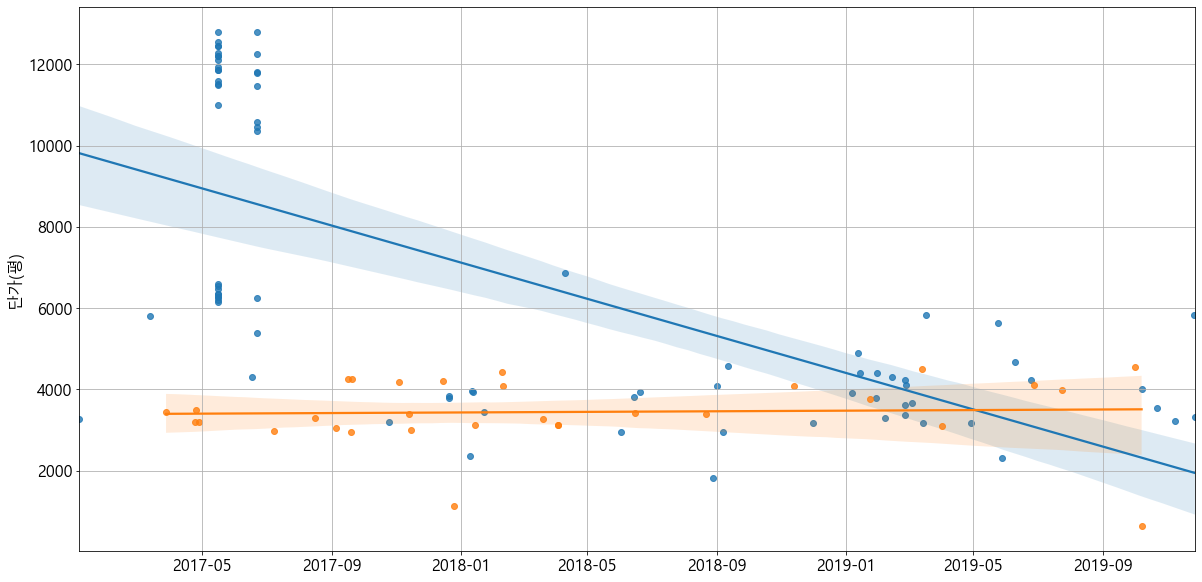

토지구매단가(평): 3754.070603024


<Figure size 432x288 with 0 Axes>

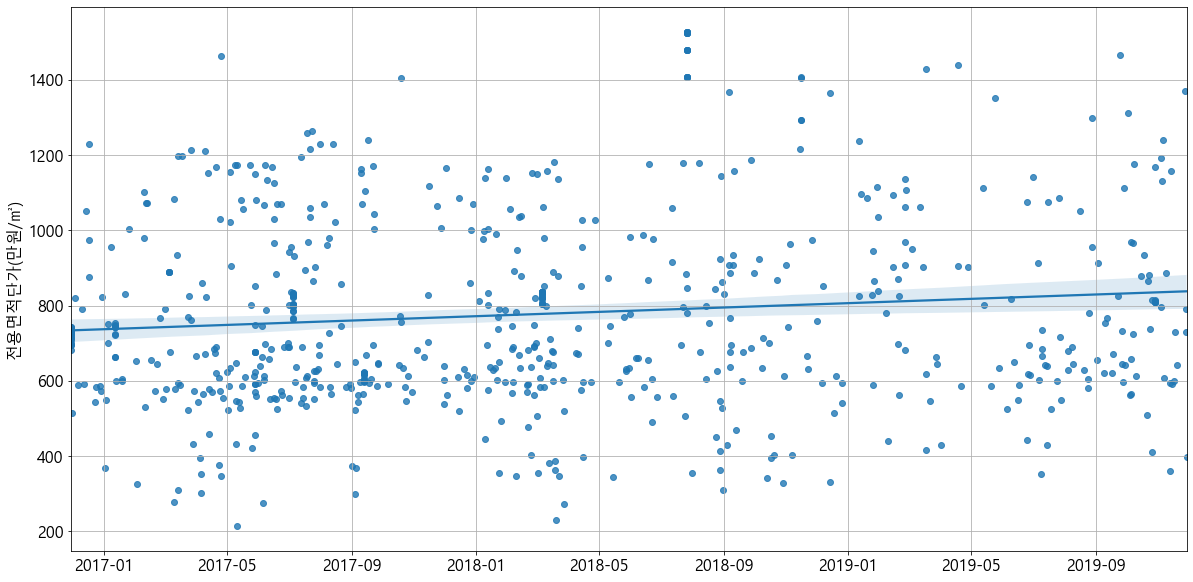

  4%|██▉                                                                                | 3/85 [00:02<01:03,  1.29it/s]

전용면적판매단가(㎡): 1145.6694
도로접면: 소로한면
순이익률(%): 11.600000000000001
강남구 역삼동 일반상


<Figure size 432x288 with 0 Axes>

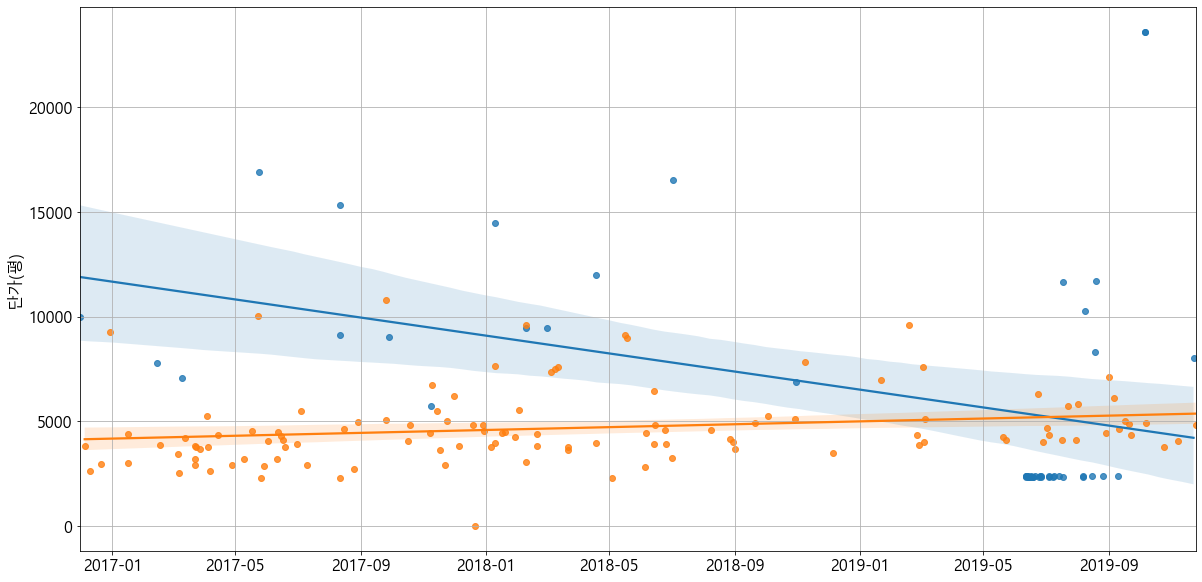

토지구매단가(평): 8639.603312378502


<Figure size 432x288 with 0 Axes>

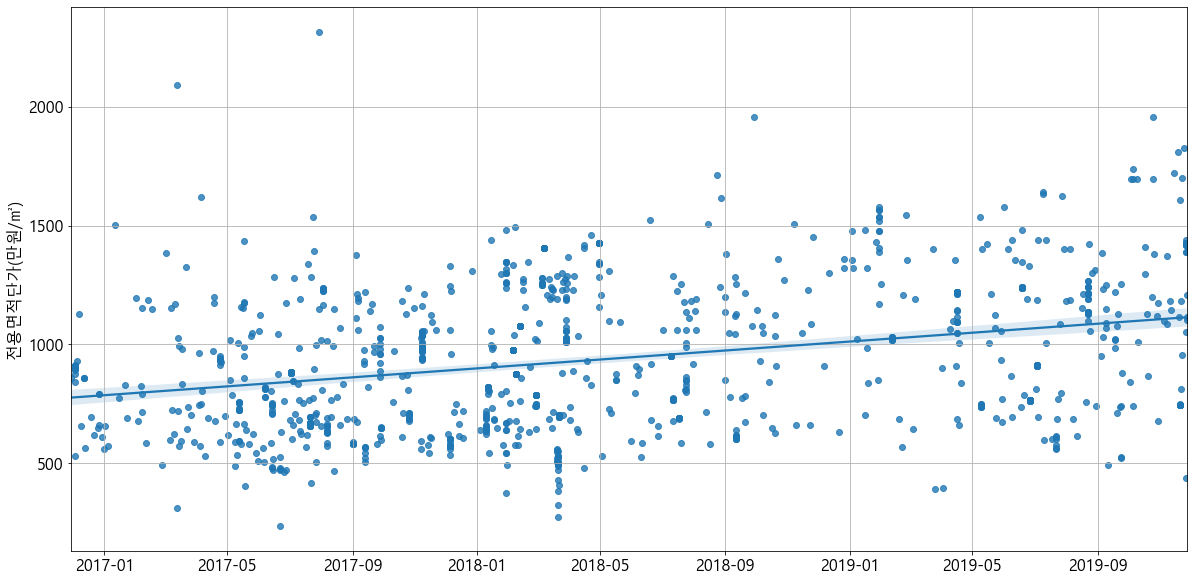

  5%|███▉                                                                               | 4/85 [00:03<01:00,  1.33it/s]

전용면적판매단가(㎡): 1721.4239
도로접면: 세로한면(가)
순이익률(%): 37.0
강남구 역삼동 2종일


<Figure size 432x288 with 0 Axes>

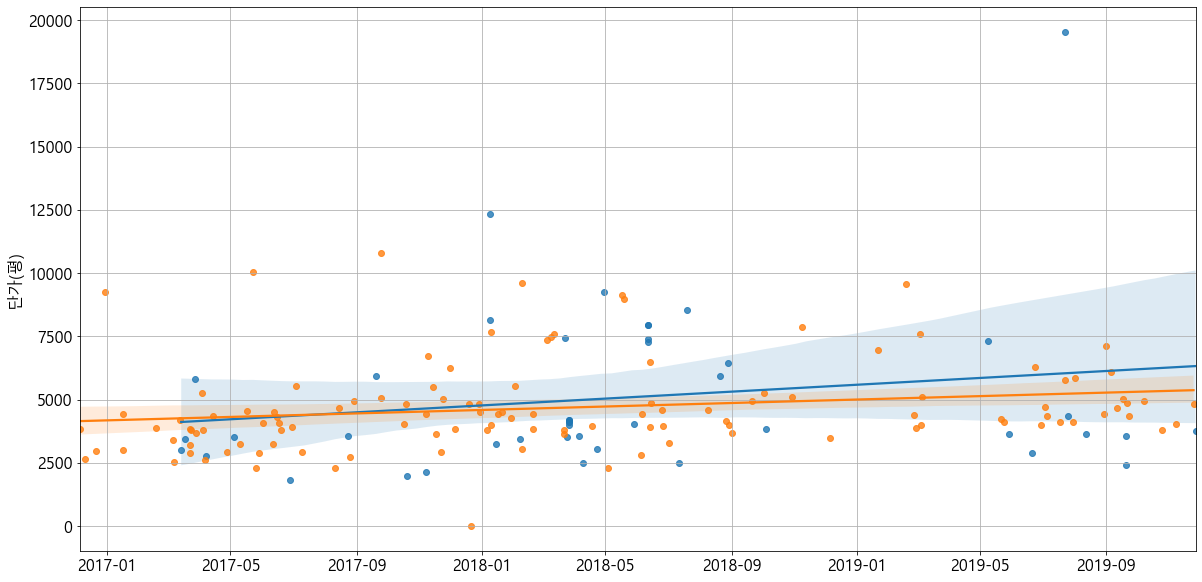

토지구매단가(평): 4978.0834496855


<Figure size 432x288 with 0 Axes>

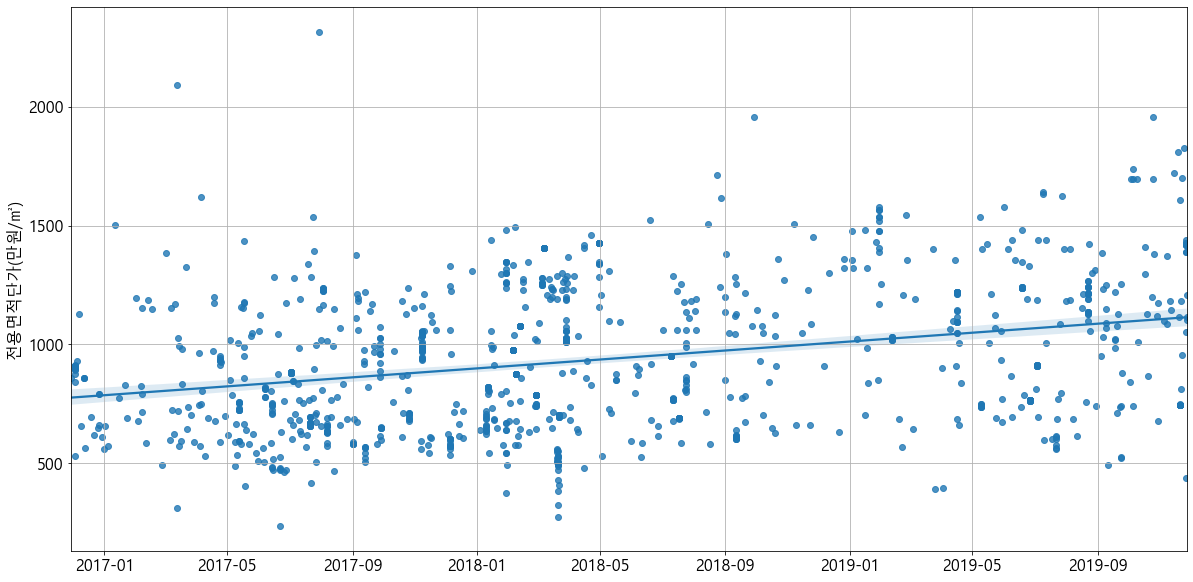

  6%|████▉                                                                              | 5/85 [00:03<01:02,  1.27it/s]

전용면적판매단가(㎡): 1824.7001
도로접면: 세로한면(가)
순이익률(%): 22.5
강남구 역삼동 2종일


<Figure size 432x288 with 0 Axes>

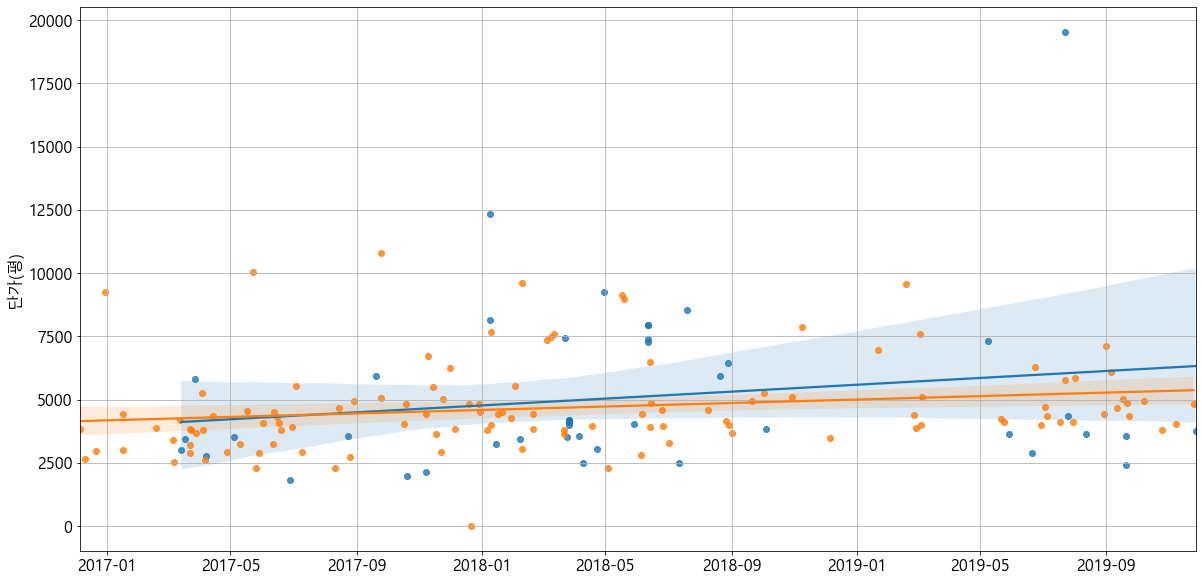

토지구매단가(평): 5031.63617495


<Figure size 432x288 with 0 Axes>

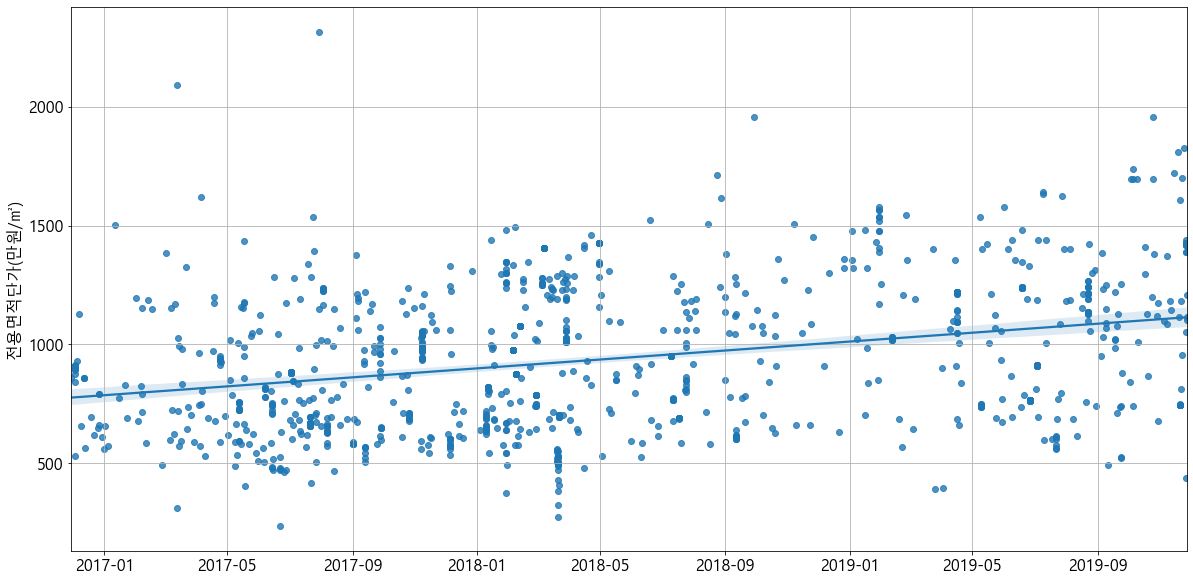

  6%|████▉                                                                              | 5/85 [00:04<01:14,  1.07it/s]

전용면적판매단가(㎡): 1656.9493
도로접면: 세로각지(가)
순이익률(%): 30.9


<Figure size 432x288 with 0 Axes>

In [131]:
count = 0
for i in tqdm(range(reference_df.shape[0])):
    gu = reference_df.loc[i, '소재지_지역']
    dong = reference_df.loc[i, '소재지_소재지']
    usage = reference_df.loc[i, '토지내용_용도지역'][:3]
    timepoint = pd.to_datetime(reference_df.loc[i, '수입/비용_기준시점'], format='%Y.%m.%d')
    
    print(gu, dong, usage)
    
    land_target_df = common_df[
        (common_df['시군구'].str.contains(gu+' '+dong))&
        (common_df['용도지역'].str.contains(usage))&
        (common_df['계약날짜'] <= timepoint)&
        (common_df['계약날짜'] >= (timepoint - pd.DateOffset(years=3)))
    ]
    
    dandok_target_df = dandok_df[
        (dandok_df['시군구'].str.contains(gu+' '+dong))&
        (dandok_df['계약날짜'] <= timepoint)&
        (dandok_df['계약날짜'] >= (timepoint - pd.DateOffset(years=3)))
    ]
    
    font = {'size': 16}
    matplotlib.rc('font', **font)
    f, ax = plt.subplots(figsize=(20,10))
    #plt.title('{}~최신 {} {} 토지, 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건과 (파랑) 및 단독주택 실거래 {}건의 (주홍) 단가 산포도와 회귀선'.format(계약일자시점, target, target_purpose, target_df.shape[0], dandok_target_df.shape[0]))
    plt.grid(True)
    ax.xaxis.update_units(land_target_df['계약날짜'])
    sns.regplot(x=ax.xaxis.convert_units(land_target_df['계약날짜']), y=land_target_df['단가(평)'])
    ax.xaxis.update_units(dandok_target_df['계약날짜'])
    sns.regplot(x=ax.xaxis.convert_units(dandok_target_df['계약날짜']), y=dandok_target_df['단가(평)'])
    #plt.savefig(basedir + '{}{}/산포도.png'.format(target, target_purpose))
    plt.show()
    plt.clf()
    
    print('토지구매단가(평):', reference_df.loc[i, '토지내용_토지매매단가\n(원/㎡)'] / 10000 * 3.305785)
    
    house_target_df = yunrip_merge_df[
        (yunrip_merge_df['지번주소'].str.contains(gu+' '+dong))&
        #(yunrip_merge_df['용도지역명1'].str.contains(usage))&
        (yunrip_merge_df['계약날짜'] <= timepoint)&
        (yunrip_merge_df['계약날짜'] >= (timepoint - pd.DateOffset(years=3)))
        #(yunrip_merge_df['건물연식'] <= 5)
    ]
    
    font = {'size': 16}
    matplotlib.rc('font', **font)
    f, ax = plt.subplots(figsize=(20,10))
    #plt.title('개봉동 연립/다세대 전용면적 단가 - 2종일반(파랑) & 3종일반(주홍)')
    plt.grid(True)
    ax.xaxis.update_units(house_target_df['계약날짜'])
    sns.regplot(x=ax.xaxis.convert_units(house_target_df['계약날짜']), y=house_target_df['전용면적단가(만원/㎡)'])
    #plt.savefig('./국토교통부_실거래가_공개시스템/집값분석/개봉동_2종일반_3종일반/산포도.png')
    
    plt.show()
    plt.clf()
    
    print('전용면적판매단가(㎡):', reference_df.loc[i, '평가단가(원/전유㎡) _전유면적'] / 10000)
    
    print('도로접면:', reference_df.loc[i, '도로접면'])
    
    print('순이익률(%):', reference_df.loc[i, '수입/비용_순이익율'] * 100)
    
    count += 1
    if count > 5:
        break